In [91]:
# Import our dependencies
from sklearn import linear_model
import pandas as pd
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

This notebook creates several models to visualize and then test model's coefficient to show accuracy.

In [92]:
# Reads in yearly metrics csv
# *7 total counties
File_path = "../resources/county_yearly_metrics_data.csv"
county_yearly_df = pd.read_csv(File_path)
county_yearly_df

,county,obs_year,county_name,station_count,coldest_day,coldest_dayofyear,hottest_day,hottest_dayofyear,last_freeze_date,last_freeze_dayofyear,first_freeze_date,first_freeze_dayofyear,observations_recorded_april_to_may
0,27003,2002,Anoka County,4,-8.0,62.0,92.0,181.0,2002-05-20,140.0,2002-10-07,280.0,89.0
1,27003,2003,Anoka County,4,-19.0,38.0,96.0,236.0,2003-04-22,112.0,2003-09-29,272.0,104.0
2,27003,2004,Anoka County,4,-29.0,30.0,96.0,203.0,2004-05-15,136.0,2004-09-07,251.0,181.0
3,27003,2005,Anoka County,4,-22.0,17.0,96.0,174.0,2005-05-16,136.0,2005-10-07,280.0,182.0
4,27003,2006,Anoka County,4,-17.0,49.0,100.0,212.0,2006-05-22,142.0,2006-10-05,278.0,92.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
142,27163,2018,Washington County,2,-19.0,6.0,97.0,149.0,2018-04-25,115.0,2018-10-12,285.0,91.0
143,27163,2019,Washington County,2,-34.0,32.0,90.0,201.0,2019-05-03,123.0,2019-10-13,286.0,91.0
144,27163,2020,Washington County,2,-17.0,45.0,93.0,161.0,2020-05-12,133.0,2020-10-04,278.0,82.0
145,27163,2021,Washington County,2,-26.0,46.0,95.0,157.0,2021-05-11,131.0,2021-10-22,295.0,89.0


In [93]:
Frost_day_df = county_yearly_df[["county_name", "obs_year", "last_freeze_dayofyear"]].copy()
Frost_day_df

,county_name,obs_year,last_freeze_dayofyear
0,Anoka County,2002,140.0
1,Anoka County,2003,112.0
2,Anoka County,2004,136.0
3,Anoka County,2005,136.0
4,Anoka County,2006,142.0
...,...,...,...
142,Washington County,2018,115.0
143,Washington County,2019,123.0
144,Washington County,2020,133.0
145,Washington County,2021,131.0


In [94]:
Frost_day_df = Frost_day_df.dropna()

In [95]:
Frost_day_df = Frost_day_df.reset_index(drop=True)

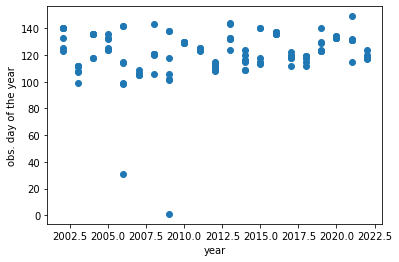

In [96]:
plt.scatter(Frost_day_df.obs_year, Frost_day_df.last_freeze_dayofyear)
plt.xlabel("year")
plt.ylabel("obs. day of the year")
plt.show()

In [97]:
X = Frost_day_df.obs_year.values.reshape(-1, 1)
y = Frost_day_df.last_freeze_dayofyear

In [98]:
model = LinearRegression()
model.fit(X, y)

LinearRegression()

In [99]:
y_pred = model.predict(X)
print(y_pred.shape)

(146,)


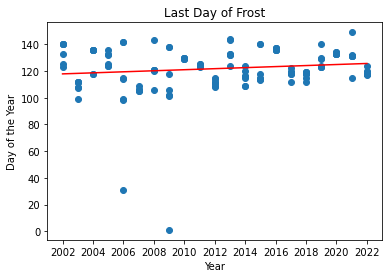

In [100]:
plt.scatter(X, y)
plt.plot(X, y_pred, color='red')
plt.xlabel("Year")
plt.ylabel("Day of the Year")
plt.title("Last Day of Frost")
plt.xticks([2002, 2004, 2006, 2008, 2010, 2012, 2014, 2016, 2018, 2020, 2022])
plt.show()

In [101]:
print(model.coef_)

[0.38943131]


In [102]:
# Ask user to enter county, keeps asking until valid county name is entered
# Need to enter "County" after the county name
countyList = ["Hennepin County", "Carver County", "Anoka County", "Ramsey County", "Washington County", "Scott County", "Dakota County"]

a = True

while a:

    userInput = input("Enter county name to predict last freeze day for 2023. \nHennepin County,\nCarver County,\nAnoka County,\nRamsey County,\nWashington County,\nScott County, or\nDakota County")

    if userInput not in countyList:
        print("County not found, please enter correctly!")
    else:
        print("County found!")
        a = False

# Take userInput and remove all other counties from Frost_day_df
if userInput == "Hennepin County":
    Frost_day_df = Frost_day_df[Frost_day_df.county_name == userInput]
elif userInput == "Carver County":
    Frost_day_df = Frost_day_df[Frost_day_df.county_name == userInput]
elif userInput == "Anoka County":
    Frost_day_df = Frost_day_df[Frost_day_df.county_name == userInput]
elif userInput == "Ramsey County":
    Frost_day_df = Frost_day_df[Frost_day_df.county_name == userInput]
elif userInput == "Washington County":
    Frost_day_df = Frost_day_df[Frost_day_df.county_name == userInput]
elif userInput == "Scott County":
    Frost_day_df = Frost_day_df[Frost_day_df.county_name == userInput]
else:
     Frost_day_df = Frost_day_df[Frost_day_df.county_name == userInput]

County found!


In [103]:
X = Frost_day_df.obs_year.values.reshape(-1, 1)
y = Frost_day_df.last_freeze_dayofyear

In [104]:
model = LinearRegression()
model.fit(X, y)

LinearRegression()

In [105]:
print(model.coef_)

[0.02987013]


In [106]:
# Run model for predicted year of 2023
predicted_dayofyear = model.predict([[2022]])

print(f"Predicted last day of frost for {userInput} in 2023 is {predicted_dayofyear}")

Predicted last day of frost for Hennepin County in 2023 is [123.87012987]


In [107]:
Frost_day_df = county_yearly_df[["county_name", "obs_year", "last_freeze_dayofyear"]].copy()

In [108]:
Frost_day_df = Frost_day_df.dropna()

In [109]:
Frost_day_df = Frost_day_df.reset_index(drop=True)

In [110]:
# Ask user to enter county, keeps asking until valid county name is entered
# Need to enter "County" after the county name
countyList = ["Hennepin County", "Carver County", "Anoka County", "Ramsey County", "Washington County", "Scott County", "Dakota County"]

a = True

while a:

    userInput = input("Enter county name to predict last freeze day for 2023. \nHennepin County,\nCarver County,\nAnoka County,\nRamsey County,\nWashington County,\nScott County, or\nDakota County")

    if userInput not in countyList:
        print("County not found, please enter correctly!")
    else:
        print("County found!")
        a = False

# Take userInput and remove all other counties from Frost_day_df
if userInput == "Hennepin County":
    Frost_day_df = Frost_day_df[Frost_day_df.county_name == userInput]
elif userInput == "Carver County":
    Frost_day_df = Frost_day_df[Frost_day_df.county_name == userInput]
elif userInput == "Anoka County":
    Frost_day_df = Frost_day_df[Frost_day_df.county_name == userInput]
elif userInput == "Ramsey County":
    Frost_day_df = Frost_day_df[Frost_day_df.county_name == userInput]
elif userInput == "Washington County":
    Frost_day_df = Frost_day_df[Frost_day_df.county_name == userInput]
elif userInput == "Scott County":
    Frost_day_df = Frost_day_df[Frost_day_df.county_name == userInput]
else:
     Frost_day_df = Frost_day_df[Frost_day_df.county_name == userInput]

County found!


In [111]:
X = Frost_day_df.obs_year.values.reshape(-1, 1)
y = Frost_day_df.last_freeze_dayofyear

In [112]:
model = LinearRegression()
model.fit(X, y)

LinearRegression()

In [113]:
print(model.coef_)

[0.02987013]


In [114]:
# Run model for predicted year of 2023
predicted_dayofyear = model.predict([[2023]])

print(f"Predicted last day of frost for {userInput} in 2023 is {predicted_dayofyear}")

Predicted last day of frost for Hennepin County in 2023 is [123.9]


Proof of an accurate coefficient: 0.02987013

First prediction: last day of frost for Hennepin County in 2022 is day 123.87012987

Second prediction: last day of frost for Hennepin County in 2023 is day 123.9

(previous value) + ((new year difference) * (year coefficient)) = (new value)

123.87012987 + (1 * 0.02987013) = 123.9